In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
training_data = []
IMG_SIZE = 50

DATADIR = "PetImages"
IMG_Size = 100
CATEGORIES = ["Dog", "Cat"]


def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 12501/12501 [00:09<00:00, 1385.83it/s]

24946


In [9]:
import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
0
1
0
0
1
0


In [11]:
len(training_data)

24946

In [12]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[214]
   [210]
   [215]
   ...
   [218]
   [240]
   [228]]

  [[215]
   [229]
   [207]
   ...
   [238]
   [235]
   [207]]

  [[212]
   [226]
   [208]
   ...
   [245]
   [230]
   [242]]

  ...

  [[171]
   [166]
   [177]
   ...
   [138]
   [140]
   [170]]

  [[156]
   [142]
   [125]
   ...
   [142]
   [194]
   [143]]

  [[186]
   [120]
   [170]
   ...
   [147]
   [143]
   [154]]]]


In [13]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

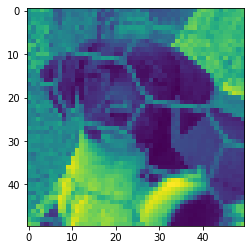

In [14]:
for sample in training_data[:10]:
    plt.imshow(sample[0])

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

W0831 15:50:19.888068 4504163776 deprecation.py:506] From /Users/prabesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0831 15:50:19.991755 4504163776 deprecation.py:323] From /Users/prabesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 244s 11ms/sample - loss: 0.6364 - acc: 0.6350 - val_loss: 0.6728 - val_acc: 0.6136
Epoch 2/10
22451/22451 [==============================] - 281s 13ms/sample - loss: 0.5745 - acc: 0.7038 - val_loss: 0.6073 - val_acc: 0.6705
Epoch 3/10
22451/22451 [==============================] - 278s 12ms/sample - loss: 0.5387 - acc: 0.7311 - val_loss: 0.5649 - val_acc: 0.7259
Epoch 4/10
22451/22451 [==============================] - 278s 12ms/sample - loss: 0.5072 - acc: 0.7559 - val_loss: 0.5449 - val_acc: 0.7339
Epoch 5/10
22451/22451 [==============================] - 280s 12ms/sample - loss: 0.4817 - acc: 0.7690 - val_loss: 0.5210 - val_acc: 0.7455
Epoch 6/10
22451/22451 [==============================] - 275s 12ms/sample - loss: 0.4615 - acc: 0.7830 - val_loss: 0.5140 - val_acc: 0.7547
Epoch 7/10
22451/22451 [==============================] - 268s 12ms/sample - loss: 0.4432 - acc: 0.7938 -